### User Overview analysis 
 - identifying the top 10 handsets used by the customers.
 - identify the top 3 handset manufacturers
  - identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams

#### importing libraries

In [6]:

!python.exe -m pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\python312\\lib\\site-packages\\pip-23.2.1.dist-info\\AUTHORS.txt'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import os

#### read cleaned csv data


In [5]:
try:
    clean_data = pd.read_csv('../data/clean_data.csv')
except BaseException:
    logging.error('either file not found or wrong format')
    
print(clean_data.shape)
clean_data = clean_data.dropna()
clean_data.info()

(150001, 45)
<class 'pandas.core.frame.DataFrame'>
Index: 120739 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       120739 non-null  float64
 1   Start                           120739 non-null  object 
 2   Start ms                        120739 non-null  float64
 3   End                             120739 non-null  object 
 4   End ms                          120739 non-null  float64
 5   Dur. (ms)                       120739 non-null  float64
 6   IMSI                            120739 non-null  float64
 7   MSISDN/Number                   120739 non-null  float64
 8   IMEI                            120739 non-null  float64
 9   Last Location Name              120739 non-null  object 
 10  Avg RTT DL (ms)                 120739 non-null  float64
 11  Avg RTT UL (ms)                 120739 non-null  float64
 12  Avg Bear

#### top 10 handsets used by the customers

<Axes: xlabel='Handset Type'>

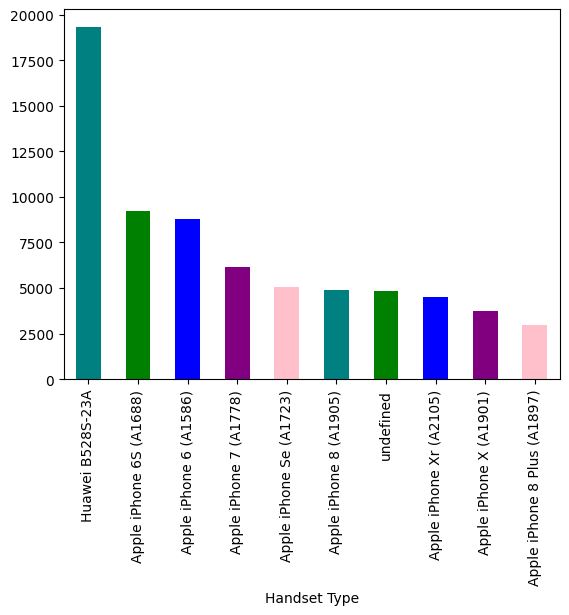

In [6]:
# top 10 handsets used by the customers
top_handsets = clean_data['Handset Type'].value_counts().head(10)
top_handsets[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])

#### top 3 handset manufacturers

<Axes: xlabel='Handset Manufacturer'>

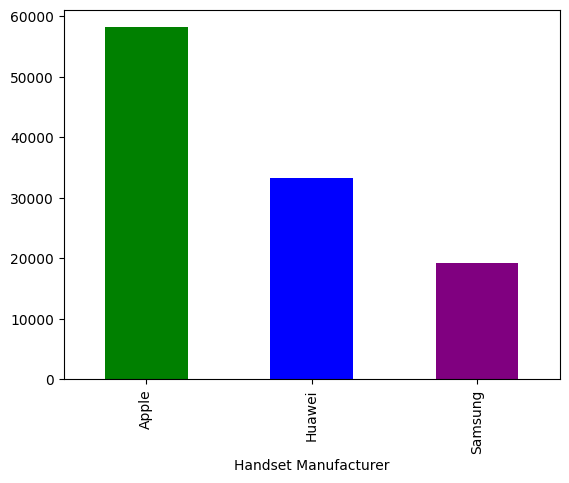

In [7]:
# top 3 handset manufacturers
top_manufacturers = clean_data['Handset Manufacturer'].value_counts().head(3)
top_manufacturers[:3].plot(kind='bar', color=[ 'green', 'blue','purple'])

#### top 5 handsets per top 3 handset manufacturer

In [9]:
top_handsets_per_manufacturer = {}

for manufacturer in top_manufacturers:
    if manufacturer in clean_data['Handset Manufacturer'].unique():
        manufacturer_df = clean_data[clean_data['Handset Manufacturer'] == manufacturer]
        top_handsets = manufacturer_df['Handset Type'].value_counts().head(5)
        top_handsets_per_manufacturer[manufacturer] = top_handsets
    else:
        top_handsets_per_manufacturer[manufacturer] = pd.Series([])

# Step 3: Display the top 5 handsets for each top manufacturer
for manufacturer, top_handsets in top_handsets_per_manufacturer.items():
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_handsets)


Top 5 Handsets for 58190:
Series([], dtype: object)

Top 5 Handsets for 33306:
Series([], dtype: object)

Top 5 Handsets for 19167:
Series([], dtype: object)
